<h1>Imports</h1>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

<h1>Loading Dataset</h1>

In [30]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal = ',')

<h1>Accessing Some Rows</h1>

In [31]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


<h1>Handling for Missing Values</h1>

In [41]:
df_cleaned = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Date'] + ' ' + df_cleaned['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')
df_cleaned = df_cleaned.drop(columns=['Date', 'Time'])
df_cleaned = df_cleaned.dropna(subset=['Datetime'])
df_cleaned = df_cleaned.fillna(method='ffill')
df_cleaned_info = df_cleaned.info()
df_cleaned_head = df_cleaned.head()
df_cleaned_info, df_cleaned_head

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    9357 non-null   float64       
 2   NMHC(GT)       9357 non-null   float64       
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  9357 non-null   float64       
 5   NOx(GT)        9357 non-null   float64       
 6   PT08.S3(NOx)   9357 non-null   float64       
 7   NO2(GT)        9357 non-null   float64       
 8   PT08.S4(NO2)   9357 non-null   float64       
 9   PT08.S5(O3)    9357 non-null   float64       
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
 13  Datetime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.1 MB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10512\4256682706.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='ffill')


(None,
    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
 0     2.6       1360.0     150.0      11.9         1046.0    166.0   
 1     2.0       1292.0     112.0       9.4          955.0    103.0   
 2     2.2       1402.0      88.0       9.0          939.0    131.0   
 3     2.2       1376.0      80.0       9.2          948.0    172.0   
 4     1.6       1272.0      51.0       6.5          836.0    131.0   
 
    PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
 0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   
 1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   
 2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   
 3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867   
 4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888   
 
              Datetime  
 0 2004-03-10 18:00:00  
 1 2004-03-10 19:00:00  
 2 2004-03-10 20:00:00  
 3 2004

<h1>Plotting Graphs</h1>

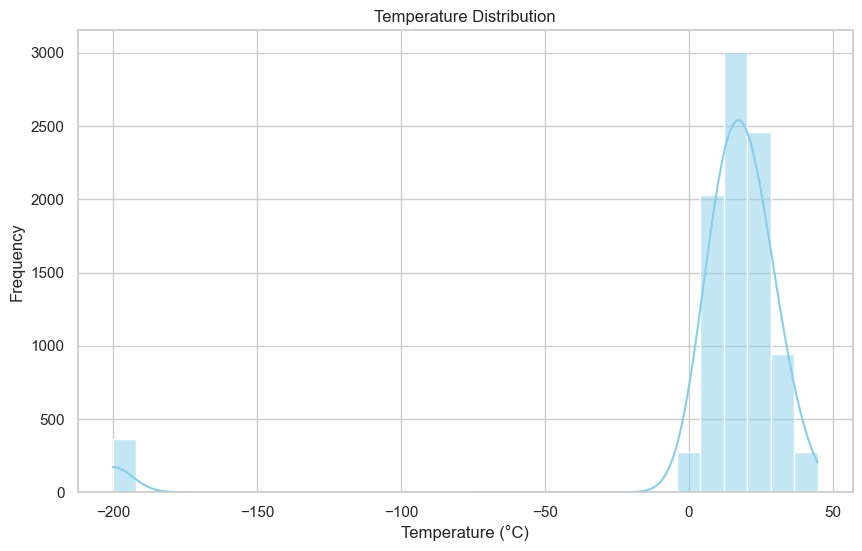

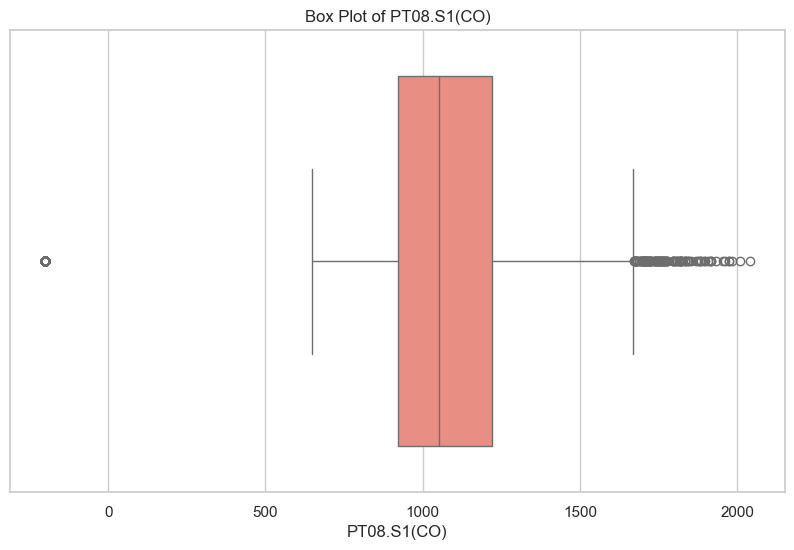

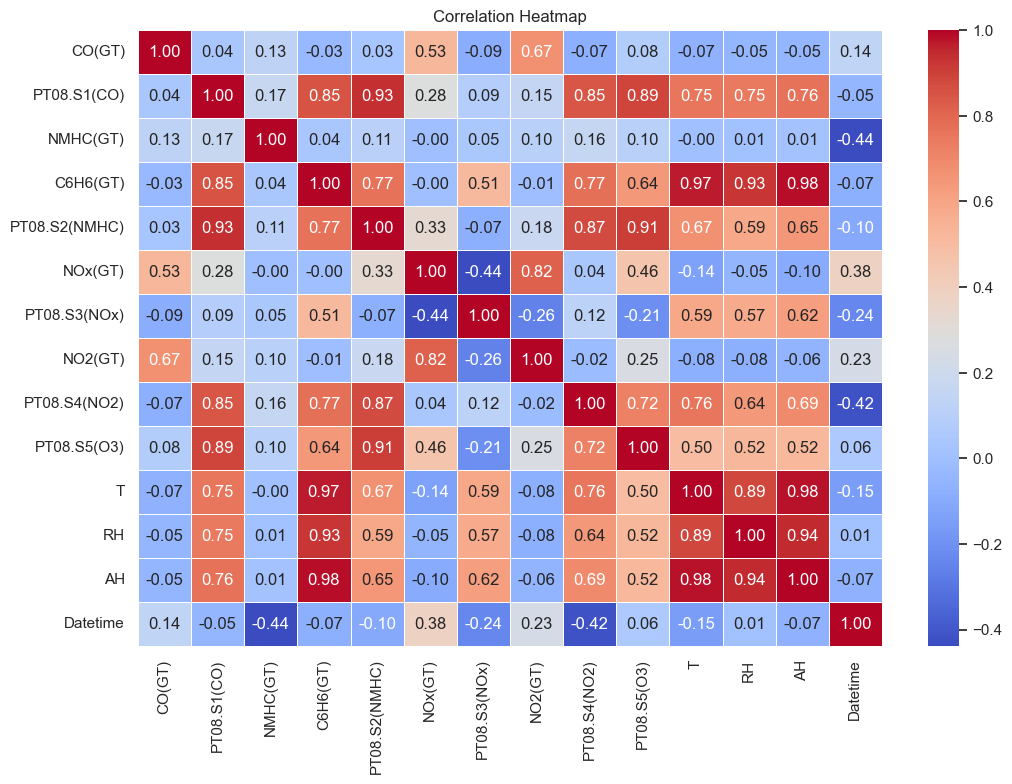

In [34]:
sns.set(style="whitegrid")

# Histogram of the 'T' (Temperature) column
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['T'], bins=30, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Box plot of the 'CO(GT)' column to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['PT08.S1(CO)'], color='salmon')
plt.title('Box Plot of PT08.S1(CO)')
plt.xlabel('PT08.S1(CO)')
plt.show()

# Heatmap of correlations between the numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<h1>Time Series Distribution</h1>

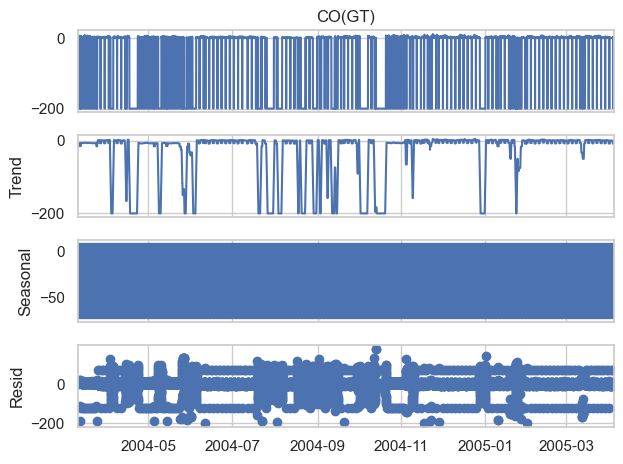

In [40]:
df_ts = df_cleaned.set_index('Datetime')
result = seasonal_decompose(df_ts['CO(GT)'], model='additive', period=24)
result.plot()
plt.show()